In [6]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# データ読込
train = pd.read_csv("./train.csv")
pred = pd.read_csv("./test.csv")

# 特徴量抽出
train = train.loc[:,["MSZoning", "MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "SalePrice"]]
pred = pred.loc[:,["Id","MSZoning", "MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]

# 欠損値を埋める
train.fillna({"LotFrontage": train["LotFrontage"].median()}, inplace = True)
train.fillna({"MasVnrArea": 0}, inplace = True)
pred.fillna({"MSZoning": "RL"}, inplace = True)
pred.fillna({"LotFrontage": train["LotFrontage"].median()}, inplace = True)
pred.fillna({"MasVnrArea": 0}, inplace = True)
pred.fillna({"BsmtUnfSF": 0}, inplace = True)
pred.fillna({"TotalBsmtSF": 0}, inplace = True)
pred.fillna({"GarageCars": 0}, inplace = True)
pred.fillna({"GarageArea": 0}, inplace = True)

# 数値変換
for column in ["MSSubClass"]:
    le = LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    pred[column] = le.transform(pred[column])

# 標準化
# for column in ["MSSubClass", "LotFrontage", "LotArea", "MasVnrArea"]:
#     ss = StandardScaler()
#     ss.fit(train[column].values.reshape(-1, 1))
#     train[column] = ss.transform(train[column].values.reshape(-1, 1))
#     pred[column] = ss.transform(pred[column].values.reshape(-1, 1))

# 学習データ作成
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 学習
# model = SGDRegressor(max_iter=1000)
# model = LinearRegression()
# model = SVR()
# model = SVR(kernel='linear')
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("予測精度", mean_squared_error(y_train, y_train_pred))

# 予測
X_pred = pred.drop("Id", axis=1)
y_pred = model.predict(X_pred)

# 提出
pd.DataFrame({
    "Id": pred["Id"],
    "SalePrice": y_pred,
}).to_csv("submission.csv", index=False)


ValueError: y contains previously unseen labels: [150]

In [176]:
print(pred.isnull().sum())

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
WoodDeckSF      0
OpenPorchSF     0
dtype: int64


In [78]:
pd.set_option('display.max_columns', 50)

train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea
0,NaN,60,3,65.0,8450,2003,2003,196.0
1,NaN,20,3,80.0,9600,1976,1976,0.0
2,NaN,60,3,68.0,11250,2001,2002,162.0
3,NaN,70,3,60.0,9550,1915,1970,0.0
4,NaN,60,3,84.0,14260,2000,2000,350.0


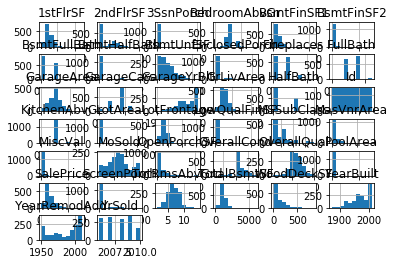

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("./train.csv")
train = train.drop(["Alley"], axis=1)
# train = train.drop(["Id", "PoolArea"], axis=1)
train.hist()
# plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示

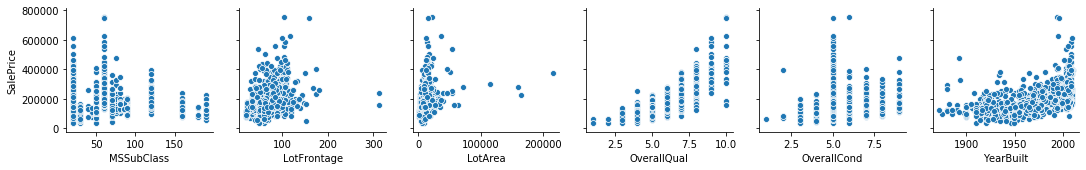

In [145]:
train = pd.read_csv("./train.csv")
pg = sns.pairplot(train, # 入力データ
                  x_vars=["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

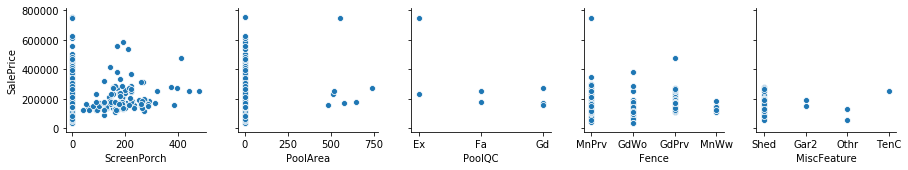

In [159]:
pg = sns.pairplot(train, # 入力データ
                  x_vars=["ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

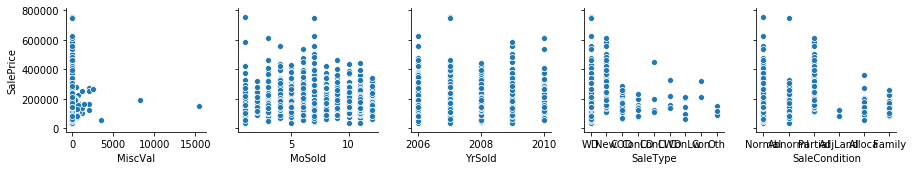

In [161]:
pg = sns.pairplot(train, # 入力データ
                  x_vars=["MiscVal","MoSold","YrSold","SaleType","SaleCondition"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

In [66]:
import optuna
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./submission.csv')

In [68]:
x = train.loc[:,["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]
y = train['SalePrice']
test_id = test["Id"]
test = test.loc[:,["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]

In [53]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, train_size=0.8, random_state=0)

In [54]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

[23:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [70]:
y_pred = model.predict(test)

In [72]:
pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_pred,
}).to_csv("submission.csv", index=False)